# RGB Cropping based on Lidar tree prediction

The goal of this notebook is to show the functionality for reading in a rgb orthophoto from the Ordway NEON site and crop out individual trees predicted by the lidar data. See github:bw4sz/TreeSegmentation

In [1]:
from DeepForest import RGB
from DeepForest import tools
import pandas as pd
from rasterio.tools.mask import mask

## Load RGB Data

In [2]:
img=RGB.RGB(filename="/Users/ben/Documents/TreeSegmentation/data/training/2017_OSBS_3_398000_3280000_image.tif")

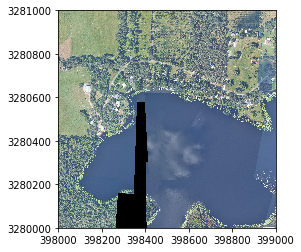

In [3]:
%matplotlib inline
img.load()
img.tile
img.plot()

# Load  Bounding Boxes

In [4]:
bboxes=pd.read_csv("/Users/Ben/Documents/TreeSegmentation/analysis/Results/bounding_boxes_NEON_D03_OSBS_DP1_398000_3280000_classified_point_cloud_laz",index_col=0)

In [5]:
bboxes.head()

,xmin,xmax,ymin,ymax,box
1,398296.60,398301.46,3280997.15,3280998.96,NEON_D03_OSBS_DP1_398000_3280000_classified_po...
2,398534.16,398539.84,3280995.59,3280998.99,NEON_D03_OSBS_DP1_398000_3280000_classified_po...
3,398877.09,398879.72,3280992.12,3280994.29,NEON_D03_OSBS_DP1_398000_3280000_classified_po...
4,398616.66,398626.77,3280920.54,3280928.44,NEON_D03_OSBS_DP1_398000_3280000_classified_po...
5,398700.50,398706.99,3280923.12,3280928.86,NEON_D03_OSBS_DP1_398000_3280000_classified_po...


In [6]:
features=tools.data2geojson(bboxes[1:5])
features[0]

{"geometry": {"coordinates": [[398534.16, 3280995.59], [398539.84, 3280995.59], [398539.84, 3280998.99], [398534.16, 3280998.99]], "properties": {"name": "NEON_D03_OSBS_DP1_398000_3280000_classified_point_cloud_laz_silva_10"}, "type": "Polygon"}, "properties": {}, "type": "Feature"}

Get bounding boxes

In [ ]:
out_image,out_transform=mask(img.tile,[features[0]],crop=True)

In [ ]:
out_image